In [27]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

loaded = np.load("../results/LR.npz")

x = loaded["x"]
loss_full_label_list = loaded["loss_full_label_list"]
loss_random_list = loaded["loss_random_list"]
loss_fs_inference_list = loaded["loss_fs_inference_list"]
loss_fs_estimate_list = loaded["loss_fs_estimate_list"]

In [12]:
full = np.mean(loss_full_label_list, axis=0)
full_std = np.std(loss_full_label_list, axis=0)

In [ ]:
full[20], full_std[20] 

(0.048760414, 0.0021068512)

In [19]:
full_inference = np.mean(loss_fs_inference_list, axis=0)
full_inference_std = np.std(loss_fs_inference_list, axis=0)
estimate = np.mean(loss_fs_estimate_list, axis=0)
estimate_std = np.std(loss_fs_estimate_list, axis=0)

In [59]:
estimate_std

array([0.00105343, 0.00111131, 0.00670254, 0.00493096, 0.00299609,
       0.00279681, 0.00226747, 0.00245483])

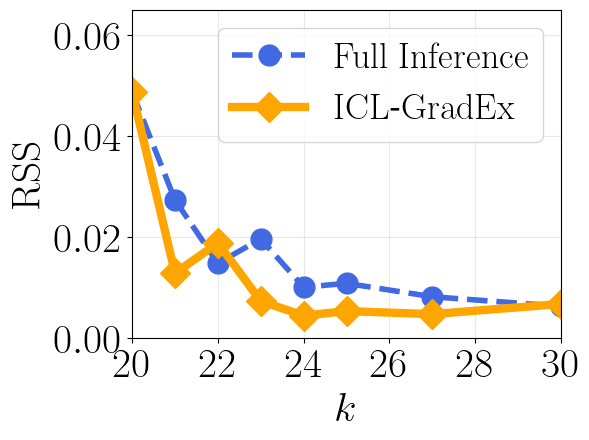

In [66]:
import matplotlib.ticker as ticker

n_total = 41
x_full = np.arange(n_total)
# plt.plot(x_full, np.mean(loss_full_label_list, axis=0), lw=4, label=r'$\mathrm{Oracle}$')
# plt.fill_between(x_full, np.mean(loss_full_label_list, axis=0)-np.std(loss_full_label_list, axis=0), np.mean(loss_full_label_list, axis=0)+np.std(loss_full_label_list, axis=0), alpha=0.2)

set_size_list = [1,2,3,4,5,7,10]
n_labeled = 20
x = np.array([20, 21, 22, 23, 24, 25, 27, 30])
full_inference = np.array([0.048760414, 0.02734813, 0.01480055, 0.019606  , 0.0100525 , 0.0108103 ,
       0.00815442, 0.00626485])
full_inference_std = np.array([0.0021068512, 0.00105343, 0.01072771, 0.00817742, 0.00615383, 0.00134037,
       0.00287516, 0.0037391 , 0.00229982])
estimate = np.array([0.048760414, 0.01282602, 0.01880766, 0.00729589, 0.00441074, 0.00531308,
       0.00470941, 0.00672845])
estimate_std = np.array([0.0021068512, 0.00105343, 0.00111131, 0.00670254, 0.00493096, 0.00299609,
       0.00279681, 0.00226747, 0.00245483])

fig, ax = plt.subplots(figsize=(6, 4.5))

#plt.plot(x, np.mean(loss_random_list, axis=0), lw=2, label="random")
#plt.fill_between(x, np.mean(loss_random_list, axis=0)-np.std(loss_random_list, axis=0), np.mean(loss_random_list, axis=0)+np.std(loss_random_list, axis=0), alpha=0.2)

plt.plot(x, full_inference, lw=4, label=r"$\mathrm{Full~Inference}$", color="royalblue",  linestyle="--", markersize=15, marker="o")
# plt.fill_between(x, full_inference-full_inference_std, full_inference+full_inference_std, alpha=0.2, color="royalblue")
plt.plot(x, estimate, lw=6, label=r"$\mathrm{ICL}$" + "-" + r"$\mathrm{GradEx}$", color="orange", markersize=15, marker="D")
# plt.fill_between(x, estimate-estimate_std, estimate+estimate_std, alpha=0.2, color="orange")

# for i in range(len(x)):
#     ax.errorbar(x[i], full_inference[i], 
#                 yerr=full_inference_std[i],
#                 capsize=5, capthick=1.5, ecolor='black')
#     ax.errorbar(x[i], estimate[i], 
#                 yerr=estimate_std[i],
#                 capsize=5, capthick=1.5, ecolor='black')



plt.xticks(fontsize=30)
plt.yticks(np.arange(0, 0.07, 0.02), fontsize=30)
plt.xlim(20, 30)
plt.ylim(0, 0.065)

plt.legend(fontsize=26)

# plt.title(r'$\mathrm{Linear~regression}$', fontsize=30)
plt.xlabel(r'$k$', fontsize=30)
plt.ylabel(r'$\mathrm{RSS}$', fontsize=30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./plot_lr.pdf", format="pdf", dpi=1200)
plt.show()